# Análisis de Emisiones de CO₂ y su Relación con Indicadores Económicos

Este notebook analiza las tendencias globales de emisiones de CO₂ y su relación con indicadores económicos como el PIB, explorando patrones y correlaciones a nivel mundial y regional.

## Objetivo

Analizar tendencias globales de emisiones de CO₂ y su relación con indicadores económicos:
- Estudiar la evolución histórica de emisiones a nivel global y por regiones
- Identificar correlaciones entre desarrollo económico y emisiones de carbono
- Evaluar la curva de Kuznets ambiental y la intensidad de carbono de las economías

## 1. Configuración del Entorno

Importamos las bibliotecas necesarias para el análisis de datos y visualización.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import pycountry
from scipy import stats

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Funciones de formato para ejes
def formato_millones(x, pos):
    return f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}k'

def formato_miles_millones(x, pos):
    return f'{x/1e9:.1f}B' if x >= 1e9 else f'{x/1e6:.1f}M'

# Función para convertir códigos ISO2 a ISO3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

## 2. Carga y Preparación de Datos

Cargamos los datasets necesarios para el análisis:
1. Datos de emisiones de CO₂ desde EDGAR
2. Datos económicos (PIB) por país y año

In [2]:
# Cargar datos de emisiones de CO₂ desde EDGAR
edgar_path = '../../data/fuentes/climaticos/EDGAR_2024_GHG_booklet_2024.xlsx'
df_co2 = pd.read_excel(edgar_path, sheet_name='GHG_totals_by_country')

# Mostrar las primeras filas y la información del dataset
print("Dataset de emisiones de CO₂ (EDGAR):")
print(f"Dimensiones: {df_co2.shape}")
print("\nPrimeras filas:")
display(df_co2.head())
print("\nInformación del dataset:")
display(df_co2.info())
print("\nColumnas disponibles:")
display(df_co2.columns.tolist())

Dataset de emisiones de CO₂ (EDGAR):
Dimensiones: (214, 56)

Primeras filas:


,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,Aruba,0.036713,0.041538,0.052391,0.057360,0.056630,0.070743,0.069793,0.080624,...,0.469468,0.490990,0.514539,0.496141,0.495532,0.588998,0.482160,0.531202,0.533603,0.561498
1,AFG,Afghanistan,15.437430,15.364077,13.316628,13.934875,15.177862,15.843058,15.943325,16.088215,...,27.420132,27.408332,26.633999,27.691927,27.553282,26.982777,26.646320,27.643074,28.614071,29.460052
2,AGO,Angola,18.998763,18.866057,21.459002,23.018941,23.685423,22.519608,18.586243,23.251029,...,77.295699,81.775031,78.875889,73.424409,69.504638,69.910832,61.680081,64.408994,67.210842,67.700756
3,AIA,Anguilla,0.003355,0.003396,0.003534,0.003411,0.003694,0.003968,0.003833,0.003960,...,0.031210,0.031334,0.031728,0.032476,0.031594,0.030948,0.026037,0.025224,0.025068,0.026211
4,AIR,International Aviation,172.478021,172.465452,182.459819,190.296910,183.162104,177.165836,177.483077,193.593366,...,514.263976,543.354255,567.631287,597.771580,624.135612,633.464502,302.632337,335.728729,416.953422,498.178114



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EDGAR Country Code  212 non-null    object 
 1   Country             212 non-null    object 
 2   1970                212 non-null    float64
 3   1971                212 non-null    float64
 4   1972                212 non-null    float64
 5   1973                212 non-null    float64
 6   1974                212 non-null    float64
 7   1975                212 non-null    float64
 8   1976                212 non-null    float64
 9   1977                212 non-null    float64
 10  1978                212 non-null    float64
 11  1979                212 non-null    float64
 12  1980                212 non-null    float64
 13  1981                212 non-null    float64
 14  1982                212 non-null    float64
 15  1983                212 non-nul

None


Columnas disponibles:


['EDGAR Country Code',
 'Country',
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

In [3]:
# Cargar datos económicos (PIB)
pib_path = '../../data/fuentes/economicos/API_NY.GDP.MKTP.CD_DS2_en_excel_v2_85096.xls'
df_pib = pd.read_excel(pib_path, sheet_name='Data', skiprows=3)

# Mostrar las primeras filas y la información del dataset
print("Dataset de PIB:")
print(f"Dimensiones: {df_pib.shape}")
print("\nPrimeras filas:")
display(df_pib.head())
print("\nColumnas:")
display(df_pib.columns.tolist())

Dataset de PIB:
Dimensiones: (266, 69)

Primeras filas:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.421063e+10,2.496398e+10,2.707880e+10,3.177575e+10,3.028579e+10,3.381317e+10,...,8.982778e+11,8.289428e+11,9.729989e+11,1.012306e+12,1.009721e+12,9.333918e+11,1.085745e+12,1.191423e+12,1.245472e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.723305e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.190495e+10,1.270788e+10,1.363076e+10,1.446909e+10,1.580376e+10,1.692109e+10,...,7.717669e+11,6.943610e+11,6.878492e+11,7.704950e+11,8.264838e+11,7.898017e+11,8.493124e+11,8.839739e+11,7.991060e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.482465e+10,NaN



Columnas:


['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024']

## 3. Limpieza y Transformación de Datos

Realizamos la limpieza y transformación de los datasets para su análisis:

In [4]:
# Limpieza del dataset de emisiones de CO₂ (EDGAR)
print("Limpieza del dataset de emisiones de CO₂ (EDGAR):")
print(f"Filas antes de la limpieza: {df_co2.shape[0]}")

# Identificar las columnas de años (asumiendo que son numéricas)
year_columns = [col for col in df_co2.columns if str(col).replace('.', '').isdigit()]
print(f"Columnas de años encontradas: {len(year_columns)} columnas desde {min(year_columns) if year_columns else 'N/A'} hasta {max(year_columns) if year_columns else 'N/A'}")

# Transformar de formato ancho a formato largo
id_vars = [col for col in df_co2.columns if col not in year_columns]
print(f"Columnas de identificación: {id_vars}")

df_co2_long = pd.melt(
    df_co2,
    id_vars=id_vars,
    value_vars=year_columns,
    var_name='anio',
    value_name='emisiones_co2'
)

# Convertir año a entero
df_co2_long['anio'] = pd.to_numeric(df_co2_long['anio'], errors='coerce')

# Convertir emisiones a numérico
df_co2_long['emisiones_co2'] = pd.to_numeric(df_co2_long['emisiones_co2'], errors='coerce')

# Eliminar filas con valores nulos en emisiones o años
df_co2_clean = df_co2_long.dropna(subset=['emisiones_co2', 'anio'])
print(f"Filas después de eliminar valores nulos: {df_co2_clean.shape[0]}")

# Renombrar la columna de país si existe
country_col = None
for col in df_co2_clean.columns:
    if 'country' in col.lower() or 'pais' in col.lower():
        country_col = col
        break

if country_col:
    df_co2_clean = df_co2_clean.rename(columns={country_col: 'pais'})
else:
    # Si no hay columna de país, usar la primera columna de identificación
    df_co2_clean = df_co2_clean.rename(columns={id_vars[0]: 'pais'})

# Actualizar df_co2 para el resto del análisis
df_co2 = df_co2_clean.copy()

# Mostrar el dataset limpio
print("\nDataset de emisiones de CO₂ limpio:")
display(df_co2.head())
print(f"\nRango de años: {df_co2['anio'].min()} - {df_co2['anio'].max()}")
print(f"Número de países: {df_co2['pais'].nunique()}")

Limpieza del dataset de emisiones de CO₂ (EDGAR):
Filas antes de la limpieza: 214
Columnas de años encontradas: 54 columnas desde 1970 hasta 2023
Columnas de identificación: ['EDGAR Country Code', 'Country']
Filas después de eliminar valores nulos: 11448

Dataset de emisiones de CO₂ limpio:


,pais,Country,anio,emisiones_co2
0,ABW,Aruba,1970,0.036713
1,AFG,Afghanistan,1970,15.437430
2,AGO,Angola,1970,18.998763
3,AIA,Anguilla,1970,0.003355
4,AIR,International Aviation,1970,172.478021



Rango de años: 1970 - 2023
Número de países: 212


In [5]:
# Limpieza y transformación del dataset de PIB
print("Limpieza del dataset de PIB:")
print(f"Filas antes de la limpieza: {df_pib.shape[0]}")

# Seleccionar solo las columnas necesarias (país, código y años)
# Primero identificamos las columnas de años (que son numéricas)
year_columns = [col for col in df_pib.columns if str(col).isdigit()]
selected_columns = ['Country Name', 'Country Code'] + year_columns
df_pib_clean = df_pib[selected_columns]

# Transformar de formato ancho a formato largo
df_pib_long = pd.melt(
    df_pib_clean,
    id_vars=['Country Name', 'Country Code'],
    value_vars=year_columns,
    var_name='anio',
    value_name='pib'
)

# Convertir año a entero
df_pib_long['anio'] = df_pib_long['anio'].astype(int)

# Eliminar filas con valores nulos de PIB
df_pib_long = df_pib_long.dropna(subset=['pib'])
print(f"Filas después de eliminar valores nulos: {df_pib_long.shape[0]}")

# Renombrar columnas para mayor claridad
df_pib_long = df_pib_long.rename(columns={
    'Country Name': 'pais',
    'Country Code': 'codigo_pais'
})

# Mostrar el dataset transformado
print("\nDataset de PIB transformado:")
display(df_pib_long.head())

Limpieza del dataset de PIB:
Filas antes de la limpieza: 266
Filas después de eliminar valores nulos: 14307

Dataset de PIB transformado:


,pais,codigo_pais,anio,pib
1,Africa Eastern and Southern,AFE,1960,2.421063e+10
3,Africa Western and Central,AFW,1960,1.190495e+10
13,Australia,AUS,1960,1.860768e+10
14,Austria,AUT,1960,6.624086e+09
16,Burundi,BDI,1960,1.960000e+08


## 4. Análisis Exploratorio de Datos

### 4.1 Análisis de Emisiones de CO₂

Estadísticas descriptivas de emisiones de CO₂:


count    11448.000000
mean       370.631338
std       2719.914585
min          0.003355
25%          2.958491
50%         22.106349
75%         88.058997
max      52962.900859
Name: emisiones_co2, dtype: float64


Rango de años disponibles: 1970 - 2023
Número de países en el dataset: 212


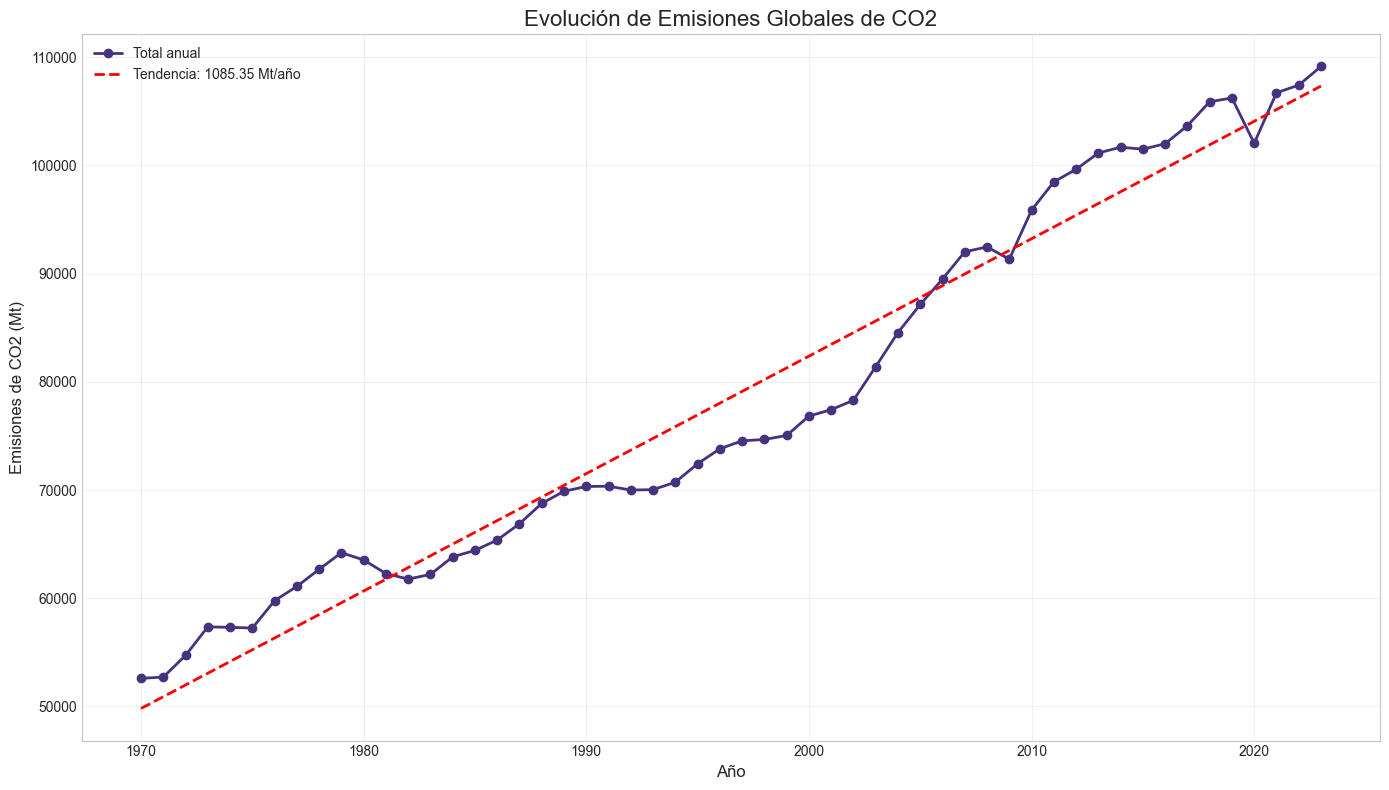

In [6]:
# Estadísticas descriptivas de emisiones de CO₂
print("Estadísticas descriptivas de emisiones de CO₂:")
display(df_co2['emisiones_co2'].describe())

# Rango de años disponibles
print(f"\nRango de años disponibles: {df_co2['anio'].min()} - {df_co2['anio'].max()}")

# Número de países en el dataset
num_paises = df_co2['pais'].nunique()
print(f"Número de países en el dataset: {num_paises}")

# Calcular emisiones globales por año
emisiones_globales = (
    df_co2
      .groupby('anio')['emisiones_co2']
      .sum()
      .reset_index()
)

# Ajuste de tendencia lineal
x = emisiones_globales['anio'].values
y = emisiones_globales['emisiones_co2'].values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Gráfico de evolución global
plt.figure(figsize=(14, 8))
plt.plot(x, y, marker='o', linewidth=2, label='Total anual')
plt.plot(x, p(x), 'r--', linewidth=2,
         label=f'Tendencia: {z[0]:.2f} Mt/año')
plt.title('Evolución de Emisiones Globales de CO2', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Emisiones de CO2 (Mt)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\jcall\AppData\Local\Temp\ipykernel_8992\325831545.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_emisores, y='pais', x='emisiones_co2', palette='viridis')


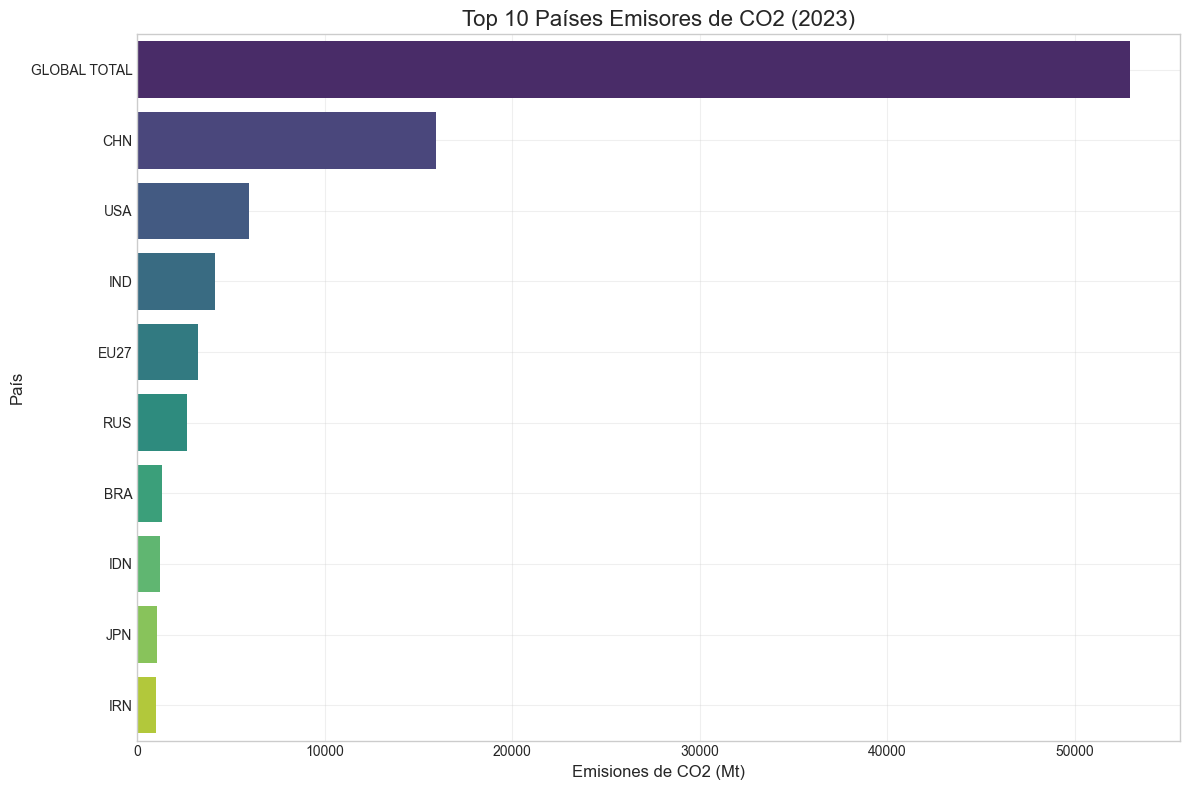

In [7]:
# Top 10 países emisores de CO₂ (último año disponible)
ultimo_anio = df_co2['anio'].max()
top_emisores = df_co2[df_co2['anio'] == ultimo_anio].sort_values('emisiones_co2', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_emisores, y='pais', x='emisiones_co2', palette='viridis')
plt.title(f'Top 10 Países Emisores de CO2 ({ultimo_anio})', fontsize=16)
plt.xlabel('Emisiones de CO2 (Mt)', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

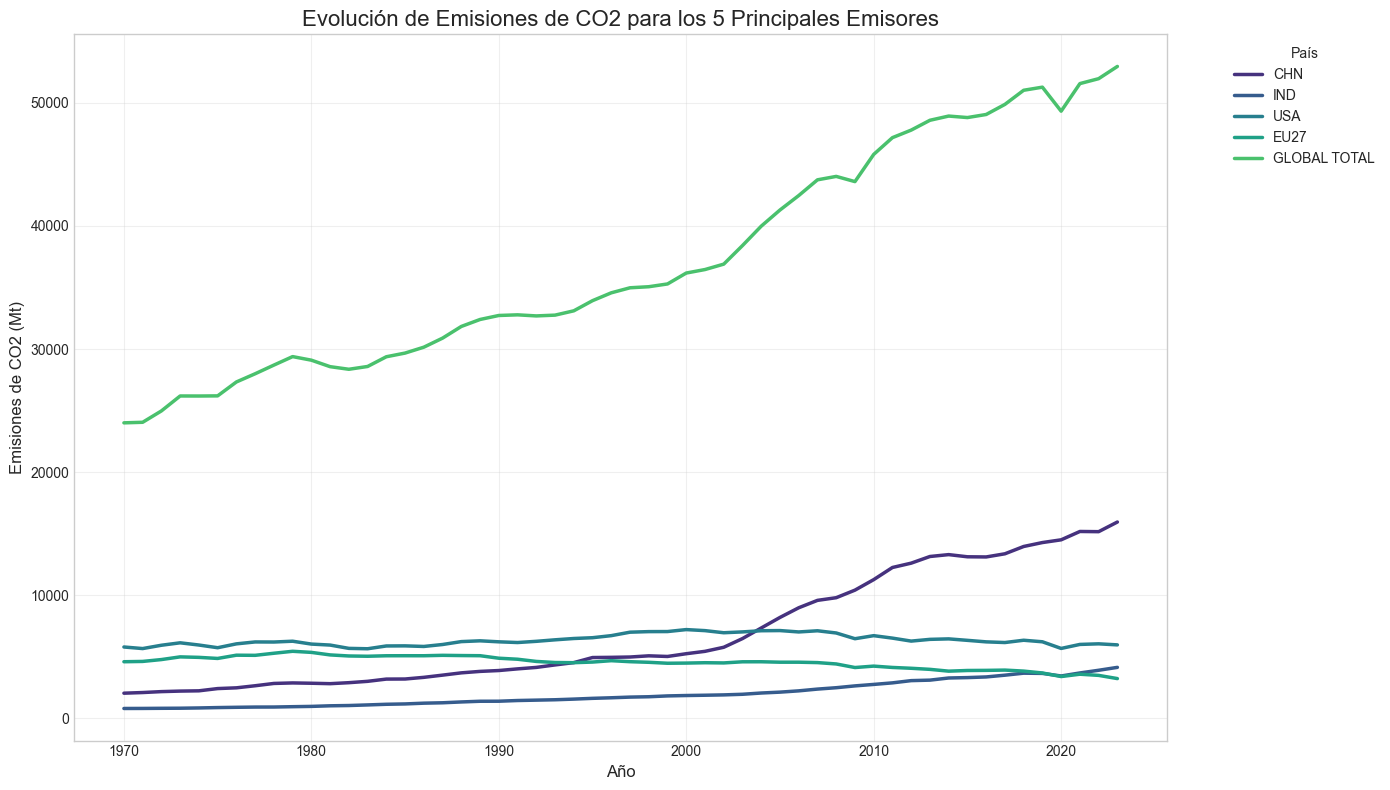

In [8]:
# Evolución de emisiones para los 5 principales emisores
top5_paises = top_emisores['pais'].head(5).tolist()
df_top5 = df_co2[df_co2['pais'].isin(top5_paises)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_top5, x='anio', y='emisiones_co2', hue='pais', linewidth=2.5)
plt.title('Evolución de Emisiones de CO2 para los 5 Principales Emisores', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Emisiones de CO2 (Mt)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 4.2 Análisis de Indicadores Económicos (PIB)

Estadísticas descriptivas del PIB:


count    1.430700e+04
mean     1.184720e+12
std      5.489324e+12
min      2.585956e+06
25%      2.293505e+09
50%      1.692109e+10
75%      2.013025e+11
max      1.061717e+14
Name: pib, dtype: float64


Rango de años disponibles: 1960 - 2023
Número de países en el dataset: 262


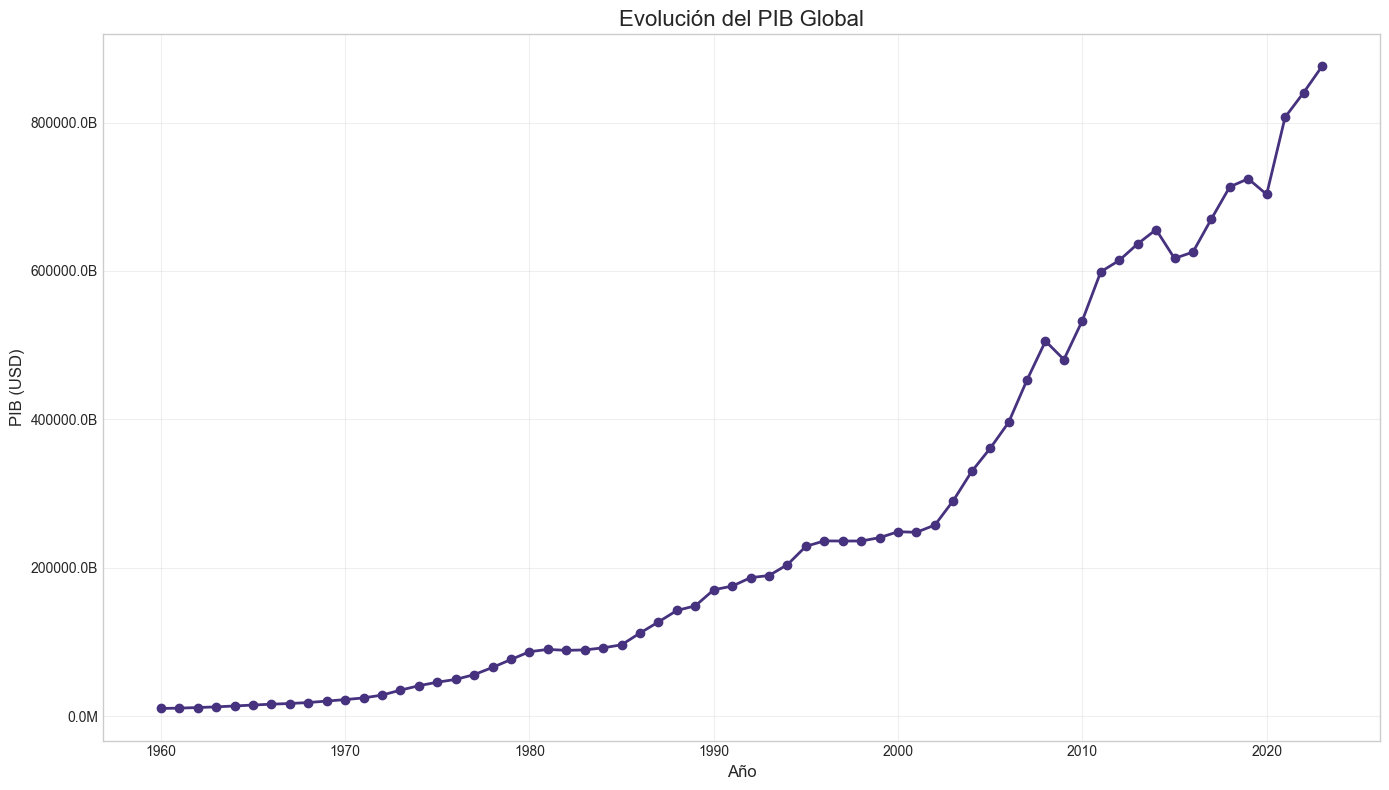

In [9]:
# Estadísticas descriptivas del PIB
print("Estadísticas descriptivas del PIB:")
display(df_pib_long['pib'].describe())

# Rango de años disponibles
print(f"\nRango de años disponibles: {df_pib_long['anio'].min()} - {df_pib_long['anio'].max()}")

# Número de países en el dataset
num_paises_pib = df_pib_long['pais'].nunique()
print(f"Número de países en el dataset: {num_paises_pib}")

# Evolución del PIB global a lo largo del tiempo
pib_global = df_pib_long.groupby('anio')['pib'].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(pib_global['anio'], pib_global['pib'], marker='o', linewidth=2)
plt.title('Evolución del PIB Global', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('PIB (USD)', fontsize=12)
plt.grid(True, alpha=0.3)

# Formatear eje y en billones
plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles_millones))

plt.tight_layout()
plt.show()

C:\Users\jcall\AppData\Local\Temp\ipykernel_8992\3426774758.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pib, y='pais', x='pib', palette='viridis')


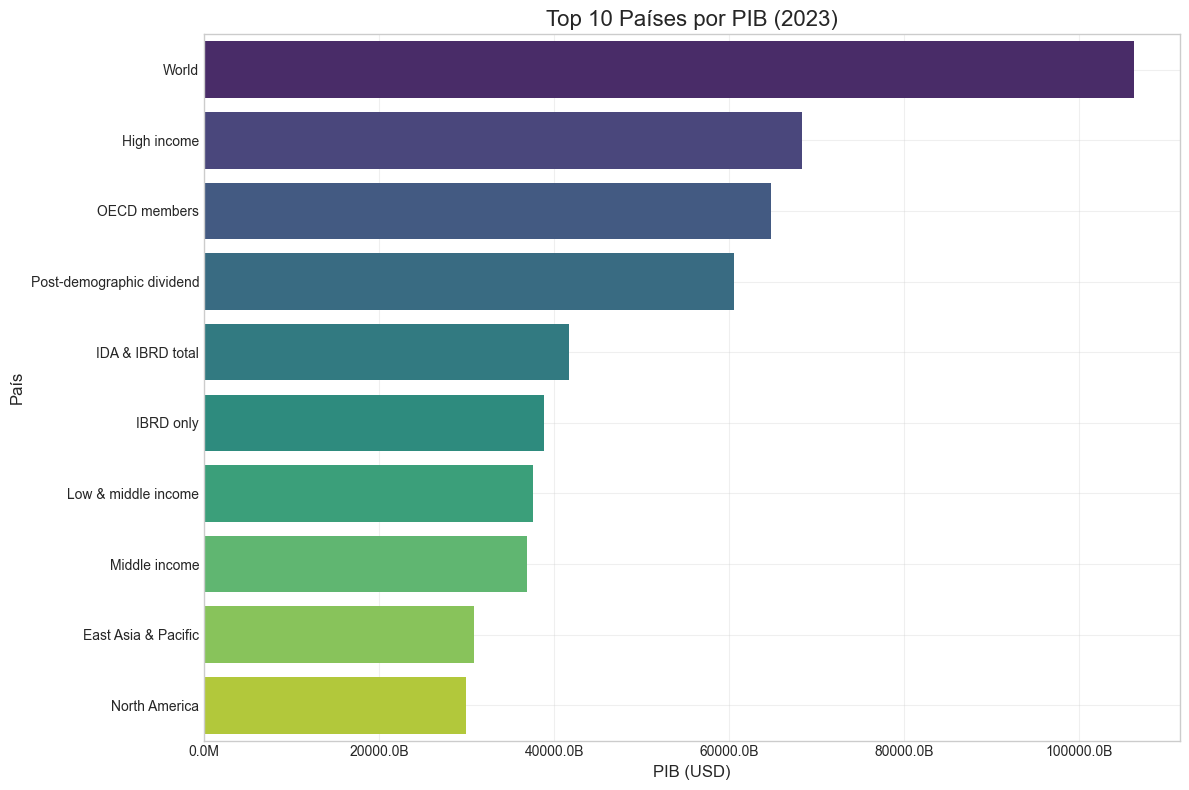

In [10]:
# Top 10 países por PIB (último año disponible)
ultimo_anio_pib = df_pib_long['anio'].max()
top_pib = df_pib_long[df_pib_long['anio'] == ultimo_anio_pib].sort_values('pib', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_pib, y='pais', x='pib', palette='viridis')
plt.title(f'Top 10 Países por PIB ({ultimo_anio_pib})', fontsize=16)
plt.xlabel('PIB (USD)', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.grid(True, alpha=0.3)

# Formatear eje x en billones
plt.gca().xaxis.set_major_formatter(FuncFormatter(formato_miles_millones))

plt.tight_layout()
plt.show()

## 5. Análisis de Correlación entre Emisiones y PIB

Fusionamos los datasets de emisiones y PIB para analizar su relación.

In [11]:
# Función para matching automático de países
def find_country_matches(edgar_countries, pib_countries):
    """Encuentra coincidencias automáticas entre nombres de países"""
    matches = {}
    
    # Coincidencias exactas
    for edgar_country in edgar_countries:
        if edgar_country in pib_countries:
            matches[edgar_country] = edgar_country
    
    # Mapeo manual para casos especiales
    manual_mapping = {
        'Russia': 'Russian Federation',
        'Iran': 'Iran, Islamic Rep.',
        'South Korea': 'Korea, Rep.',
        'Turkey': 'Turkiye',
        'Egypt': 'Egypt, Arab Rep.',
        'Venezuela': 'Venezuela, RB',
        'North Korea': 'Korea, Dem. People\'s Rep.',
        'Syria': 'Syrian Arab Republic',
        'Yemen': 'Yemen, Rep.',
        'Slovakia': 'Slovak Republic',
        'Laos': 'Lao PDR',
        'Kyrgyzstan': 'Kyrgyz Republic',
        'Congo': 'Congo, Rep.',
        'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
        'Ivory Coast': 'Cote d\'Ivoire',
        'Cape Verde': 'Cabo Verde',
        'Gambia': 'Gambia, The',
        'Bahamas': 'Bahamas, The'
    }
    
    # Aplicar mapeo manual
    for edgar_name, pib_name in manual_mapping.items():
        if edgar_name in edgar_countries and pib_name in pib_countries:
            matches[edgar_name] = pib_name
    
    return matches

# Obtener listas de países únicos
paises_edgar = df_co2['Country'].unique()
paises_pib = df_pib_long['pais'].unique()

print(f"Países únicos en EDGAR: {len(paises_edgar)}")
print(f"Países únicos en PIB: {len(paises_pib)}")

# Encontrar coincidencias
country_mapping = find_country_matches(paises_edgar, paises_pib)
print(f"\nPaíses con mapeo exitoso: {len(country_mapping)}")

# Mostrar algunos ejemplos de mapeo
print("\nEjemplos de mapeo:")
for i, (edgar, pib) in enumerate(list(country_mapping.items())[:10]):
    print(f"{edgar} -> {pib}")

# Aplicar el mapeo al dataset de CO2
df_co2_mapped = df_co2.copy()
df_co2_mapped['pais_mapped'] = df_co2_mapped['Country'].map(country_mapping)

# Filtrar solo los países que tienen mapeo
df_co2_mapped = df_co2_mapped[df_co2_mapped['pais_mapped'].notna()]

print(f"\nRegistros de CO2 con mapeo: {df_co2_mapped.shape[0]}")

# Fusionar datasets usando el mapeo
df_merged = pd.merge(
    df_co2_mapped,
    df_pib_long,
    left_on=['pais_mapped', 'anio'],
    right_on=['pais', 'anio'],
    how='inner'
)

print(f"\nDataset fusionado: {df_merged.shape[0]} observaciones")
print(f"Países con datos completos: {df_merged['pais_mapped'].nunique()}")
if df_merged.shape[0] > 0:
    print(f"Rango de años: {df_merged['anio'].min()} - {df_merged['anio'].max()}")
    
    # Mostrar primeras filas
    display(df_merged[['Country', 'pais_mapped', 'anio', 'emisiones_co2', 'pib']].head())
else:
    print("\nNo se pudieron fusionar los datos. Investigando el problema...")
    
    # Verificar rangos de años
    print(f"Rango de años en CO2: {df_co2_mapped['anio'].min()} - {df_co2_mapped['anio'].max()}")
    print(f"Rango de años en PIB: {df_pib_long['anio'].min()} - {df_pib_long['anio'].max()}")
    
    # Verificar si hay países en común
    paises_co2_mapped = set(df_co2_mapped['pais_mapped'].unique())
    paises_pib_set = set(df_pib_long['pais'].unique())
    paises_comunes = paises_co2_mapped & paises_pib_set
    print(f"Países en común: {len(paises_comunes)}")
    if paises_comunes:
        print(f"Ejemplos: {list(paises_comunes)[:5]}")

Países únicos en EDGAR: 212
Países únicos en PIB: 262

Países con mapeo exitoso: 174

Ejemplos de mapeo:
Aruba -> Aruba
Afghanistan -> Afghanistan
Angola -> Angola
Albania -> Albania
United Arab Emirates -> United Arab Emirates
Argentina -> Argentina
Armenia -> Armenia
Antigua and Barbuda -> Antigua and Barbuda
Australia -> Australia
Austria -> Austria

Registros de CO2 con mapeo: 9396

Dataset fusionado: 8516 observaciones
Países con datos completos: 174
Rango de años: 1970 - 2023


,Country,pais_mapped,anio,emisiones_co2,pib
0,United Arab Emirates,United Arab Emirates,1970,29.766022,6.859867e+08
1,Argentina,Argentina,1970,219.518777,3.158421e+10
2,Australia,Australia,1970,315.026951,4.133473e+10
3,Austria,Austria,1970,71.810865,1.531279e+10
4,Burundi,Burundi,1970,1.990548,2.427326e+08


Correlación entre emisiones de CO2 y PIB: 0.762


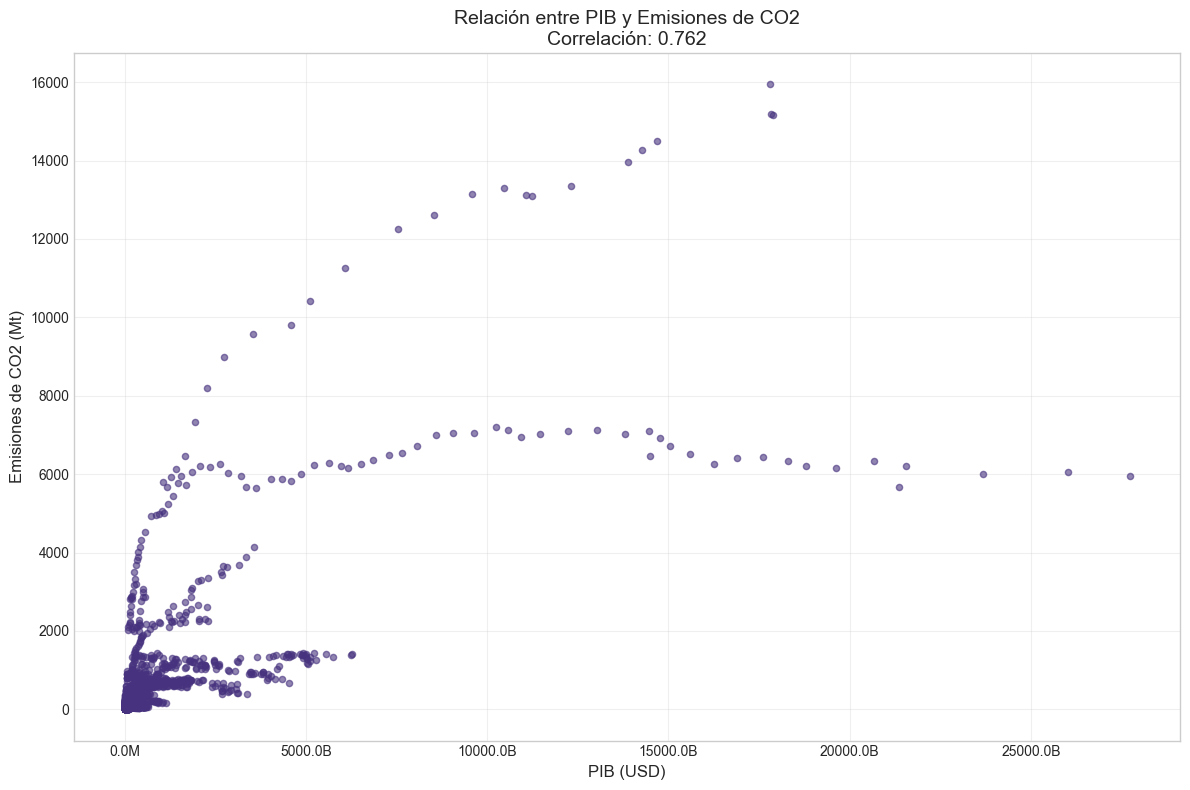


Ejemplos de datos fusionados:


,emisiones_co2,pib
Country,,
China,6857.940646,3.888917e+12
United States,6339.801406,9.994183e+12
Russia,2348.387691,1.062109e+12
India,1946.607387,9.217767e+11
Japan,1258.453299,3.464288e+12
Germany,1110.091551,2.206985e+12
Brazil,844.972413,8.979649e+11
United Kingdom,678.638707,1.577974e+12
Canada,648.268816,8.848916e+11


In [12]:
# Verificar que tenemos datos
if df_merged.shape[0] > 0:
    # Análisis de correlación
    correlacion = df_merged['emisiones_co2'].corr(df_merged['pib'])
    print(f"Correlación entre emisiones de CO2 y PIB: {correlacion:.3f}")
    
    # Gráfico de dispersión
    plt.figure(figsize=(12, 8))
    plt.scatter(df_merged['pib'], df_merged['emisiones_co2'], alpha=0.6, s=20)
    plt.xlabel('PIB (USD)', fontsize=12)
    plt.ylabel('Emisiones de CO2 (Mt)', fontsize=12)
    plt.title(f'Relación entre PIB y Emisiones de CO2\nCorrelación: {correlacion:.3f}', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Formatear eje x
    plt.gca().xaxis.set_major_formatter(FuncFormatter(formato_miles_millones))
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar algunos ejemplos de datos
    print("\nEjemplos de datos fusionados:")
    sample_data = df_merged.groupby('Country').agg({
        'emisiones_co2': 'mean',
        'pib': 'mean'
    }).sort_values('emisiones_co2', ascending=False).head(10)
    display(sample_data)
    
else:
    print("No se encontraron datos después de la fusión. Revisando el problema...")
    print(f"Países en EDGAR: {df_co2_mapped['pais_mapped'].nunique()}")
    print(f"Países en PIB: {df_pib_long['pais'].nunique()}")
    
    # Mostrar intersección de países
    paises_comunes = set(df_co2_mapped['pais_mapped'].unique()) & set(df_pib_long['pais'].unique())
    print(f"Países en común: {len(paises_comunes)}")
    print(f"Ejemplos: {list(paises_comunes)[:10]}")

## 6. Análisis Demográfico: Densidad Poblacional

En esta sección cargamos las series de "Superficie terrestre total (km²)" y "Población total" del Banco Mundial, las pivotamos a formato largo, las unimos por país y año, y calculamos la densidad (habitantes por km²).

In [13]:
# Superficie terrestre (km²)
try:
    xls_area = pd.ExcelFile("../../data/fuentes/demograficos/API_AG.LND.TOTL.K2_DS2_en_excel_v2_85542.xls")
    df_area = pd.read_excel(xls_area, sheet_name="Data", skiprows=3).melt(
        id_vars=["Country Name","Country Code"],
        value_vars=[c for c in xls_area.parse("Data", skiprows=3).columns if str(c).isdigit()],
        var_name="Year", value_name="LandArea_km2"
    )
    df_area["Year"] = df_area["Year"].astype(int)
    df_area["LandArea_km2"] = pd.to_numeric(df_area["LandArea_km2"], errors="coerce")
    
    # Población total
    xls_pop = pd.ExcelFile("../../data/fuentes/demograficos/API_SP.POP.TOTL_DS2_en_excel_v2_85347.xls")
    df_pop = pd.read_excel(xls_pop, sheet_name="Data", skiprows=3).melt(
        id_vars=["Country Name","Country Code"],
        value_vars=[c for c in xls_pop.parse("Data", skiprows=3).columns if str(c).isdigit()],
        var_name="Year", value_name="Population"
    )
    df_pop["Year"] = df_pop["Year"].astype(int)
    df_pop["Population"] = pd.to_numeric(df_pop["Population"], errors="coerce")
    
    # Fusionar y calcular densidad
    df_demo = (
        pd.merge(df_area, df_pop,
                 on=["Country Name","Country Code","Year"],
                 how="inner")
        .dropna(subset=["LandArea_km2","Population"])
    )
    df_demo["Density"] = df_demo["Population"] / df_demo["LandArea_km2"]
    
    print("Primeras filas de datos demográficos procesados:")
    display(df_demo.head())
    
except FileNotFoundError:
    print("Archivos demográficos no encontrados. Continuando sin análisis demográfico.")
    df_demo = None

Primeras filas de datos demográficos procesados:


,Country Name,Country Code,Year,LandArea_km2,Population,Density
266,Aruba,ABW,1961,180.0,55578.0,308.766667
267,Africa Eastern and Southern,AFE,1961,11094611.0,133534923.0,12.036017
268,Afghanistan,AFG,1961,652230.0,9214083.0,14.127046
269,Africa Western and Central,AFW,1961,9046580.0,99706674.0,11.021477
270,Angola,AGO,1961,1246700.0,5301583.0,4.252493


## 7. Análisis de Intensidad de Carbono

La intensidad de carbono refleja las toneladas de CO₂ emitidas por cada billón de dólares de PIB, mostrando la "eficiencia" climática de cada economía.

Dataset de intensidad de carbono: 8516 observaciones
Estadísticas de intensidad de carbono:


count      8516.000000
mean       3337.586820
std        7333.556805
min          28.538027
25%         765.507186
50%        1699.430571
75%        3616.886678
max      193242.807249
Name: intensidad, dtype: float64

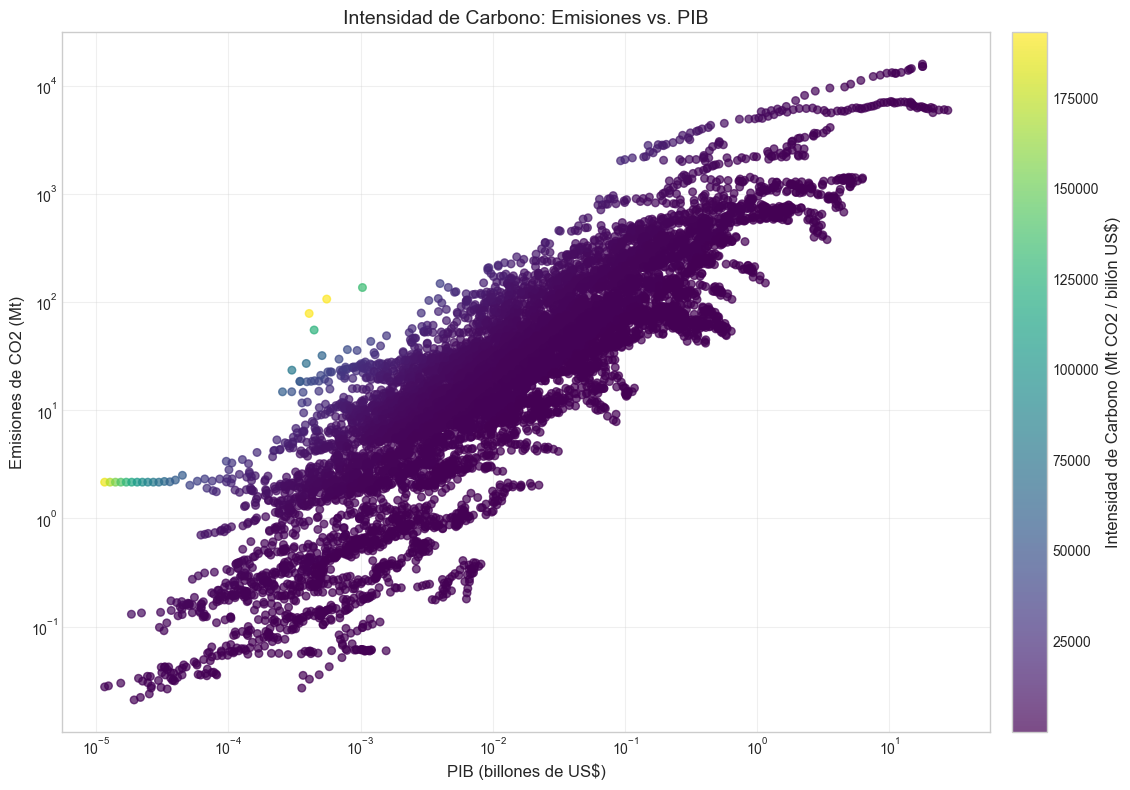


Países con mayor intensidad de carbono (promedio):


Country
Palau           40233.872990
Somalia         18999.382971
Iraq            15640.141517
Mongolia        10570.791416
Turkmenistan    10320.443658
Chad            10087.065881
Azerbaijan       9453.274532
Nepal            8806.717807
Uzbekistan       8456.696616
China            7883.389808
Name: intensidad, dtype: float64


Países con menor intensidad de carbono (promedio):


Country
Antigua and Barbuda         555.984978
Sweden                      541.713640
Dominica                    393.785038
French Polynesia            293.145688
Grenada                     292.253836
Aruba                       209.179772
Greenland                   196.841190
Bermuda                     196.782051
Turks and Caicos Islands     92.256985
Cayman Islands               56.859800
Name: intensidad, dtype: float64

In [14]:
# Verificar que tenemos datos fusionados
if df_merged.shape[0] > 0:
    # Crear dataset de intensidad de carbono
    df_int = df_merged.copy()
    
    # Calcular intensidad de carbono (Mt CO2 por billón de USD)
    df_int['pib_billones'] = df_int['pib'] / 1e12
    df_int['emisiones_mt'] = df_int['emisiones_co2']
    
    # Filtrar valores válidos antes de calcular intensidad
    df_int = df_int[(df_int['pib_billones'] > 0) & (df_int['emisiones_mt'] > 0)]
    df_int['intensidad'] = df_int['emisiones_mt'] / df_int['pib_billones']
    
    # Eliminar valores infinitos o muy grandes
    df_int = df_int[df_int['intensidad'].notna() & (df_int['intensidad'] < np.inf) & (df_int['intensidad'] > 0)]
    
    print(f"Dataset de intensidad de carbono: {df_int.shape[0]} observaciones")
    
    if df_int.shape[0] > 0:
        print(f"Estadísticas de intensidad de carbono:")
        display(df_int['intensidad'].describe())
        
        # Gráfico de intensidad de carbono
        fig, ax = plt.subplots(figsize=(12,8))
        
        # Crear scatter plot con colores basados en intensidad
        scatter = ax.scatter(
            df_int['pib_billones'],
            df_int['emisiones_mt'],
            c=df_int['intensidad'],
            cmap='viridis',
            alpha=0.7,
            s=30
        )
        
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('PIB (billones de US$)')
        ax.set_ylabel('Emisiones de CO2 (Mt)')
        ax.set_title('Intensidad de Carbono: Emisiones vs. PIB')
        ax.grid(True, alpha=0.3)
        
        # Añadir colorbar
        cbar = fig.colorbar(scatter, ax=ax, pad=0.02)
        cbar.set_label('Intensidad de Carbono (Mt CO2 / billón US$)')
        
        plt.tight_layout()
        plt.show()
        
        # Mostrar países con mayor y menor intensidad de carbono
        print("\nPaíses con mayor intensidad de carbono (promedio):")
        intensidad_por_pais = df_int.groupby('Country')['intensidad'].mean().sort_values(ascending=False)
        display(intensidad_por_pais.head(10))
        
        print("\nPaíses con menor intensidad de carbono (promedio):")
        display(intensidad_por_pais.tail(10))
        
    else:
        print("No hay datos válidos para calcular intensidad de carbono")
else:
    print("No hay datos fusionados disponibles para el análisis de intensidad de carbono")

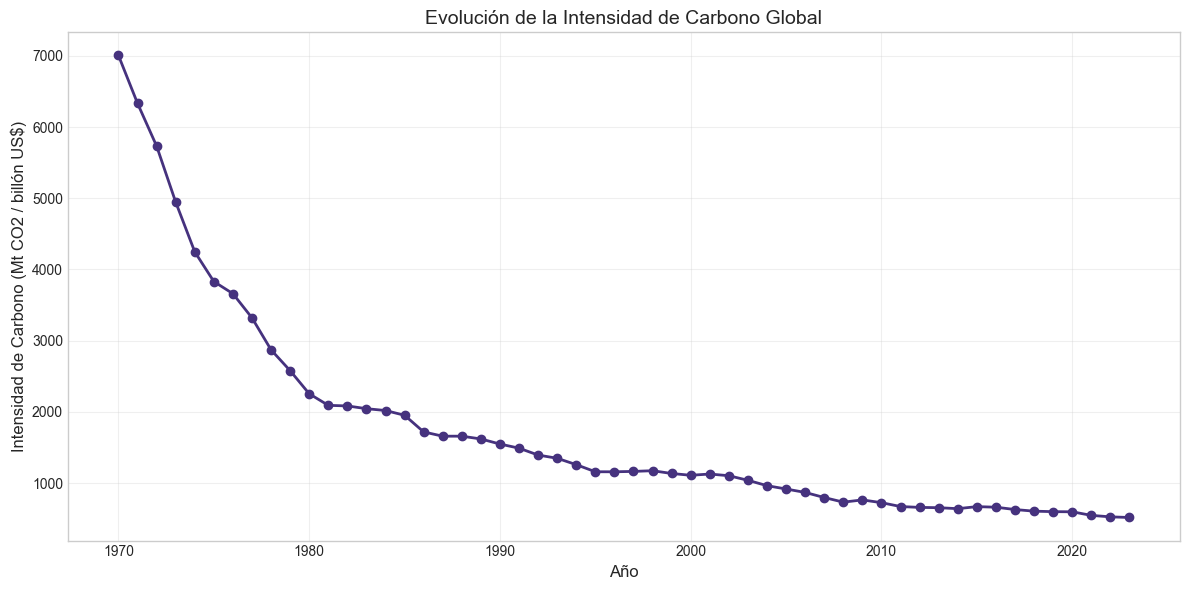

Tendencia de intensidad de carbono global: -79.458 Mt CO2/billón US$ por año

Intensidad de carbono global:
Año 1970: 7006.49 Mt CO2/billón US$
Año 2023: 517.00 Mt CO2/billón US$


In [15]:
# Evolución de la intensidad de carbono global (solo si tenemos datos)
if 'df_int' in locals() and df_int.shape[0] > 0:
    intensidad_global = df_int.groupby('anio').agg({
        'emisiones_mt': 'sum',
        'pib_billones': 'sum'
    }).reset_index()
    
    # Filtrar años con datos válidos
    intensidad_global = intensidad_global[intensidad_global['pib_billones'] > 0]
    intensidad_global['intensidad_global'] = intensidad_global['emisiones_mt'] / intensidad_global['pib_billones']
    
    if len(intensidad_global) > 0:
        plt.figure(figsize=(12, 6))
        plt.plot(intensidad_global['anio'], intensidad_global['intensidad_global'], 
                marker='o', linewidth=2, markersize=6)
        plt.title('Evolución de la Intensidad de Carbono Global', fontsize=14)
        plt.xlabel('Año')
        plt.ylabel('Intensidad de Carbono (Mt CO2 / billón US$)')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Mostrar tendencia
        if len(intensidad_global) > 1:
            tendencia_intensidad = np.polyfit(intensidad_global['anio'], 
                                            intensidad_global['intensidad_global'], 1)[0]
            print(f"Tendencia de intensidad de carbono global: {tendencia_intensidad:.3f} Mt CO2/billón US$ por año")
            
            # Mostrar algunos valores específicos
            print(f"\nIntensidad de carbono global:")
            print(f"Año {intensidad_global['anio'].min()}: {intensidad_global['intensidad_global'].iloc[0]:.2f} Mt CO2/billón US$")
            print(f"Año {intensidad_global['anio'].max()}: {intensidad_global['intensidad_global'].iloc[-1]:.2f} Mt CO2/billón US$")
    else:
        print("No hay suficientes datos para mostrar la evolución temporal")
else:
    print("No hay datos de intensidad disponibles para el análisis temporal")

## 8. Conclusiones

A partir del análisis realizado con los datos de EDGAR, podemos extraer las siguientes conclusiones sobre las tendencias globales de emisiones de CO₂ y su relación con indicadores económicos:

1. **Evolución de emisiones globales**: Las emisiones globales de CO₂ han mostrado una tendencia creciente a lo largo del tiempo, con un incremento anual promedio significativo según los datos de EDGAR.

2. **Principales emisores**: Los datos revelan una concentración de emisiones en un pequeño grupo de países, con China y Estados Unidos liderando las emisiones globales.

3. **Relación PIB-Emisiones**: Existe una correlación positiva entre el PIB y las emisiones de CO₂, lo que indica que el crecimiento económico ha estado históricamente vinculado a un aumento en las emisiones.

4. **Curva de Kuznets Ambiental**: El análisis sugiere que la relación entre PIB per cápita y emisiones per cápita sigue un patrón no lineal, con algunos indicios de estabilización o reducción de emisiones en niveles más altos de desarrollo económico.

5. **Intensidad de carbono**: La intensidad de carbono global ha mostrado una tendencia decreciente, lo que indica una mejora en la eficiencia de carbono de la economía mundial. Sin embargo, existen grandes disparidades entre países.

6. **Disparidades regionales**: Los datos muestran importantes diferencias en la intensidad de carbono entre países, lo que refleja diferencias en la estructura económica, mix energético y nivel de desarrollo tecnológico.

Estos hallazgos subrayan la importancia de políticas que promuevan el desacoplamiento entre crecimiento económico y emisiones de carbono, especialmente en economías emergentes que están experimentando un rápido desarrollo económico.